In [45]:
import pandas
import numpy
import matplotlib.pyplot as pyplot

sales = pandas.read_csv("prepped_pizza.csv").drop('Unnamed: 0', axis = 1)

#convert ingredients to lists
sales["pizza_ingredients"] = sales["pizza_ingredients"].apply(lambda ingredients: ingredients.split(", "))

In [46]:
daily_sales = pandas.DataFrame(data = [0] * 365, index = numpy.arange(1, 366).tolist(), columns = ["item_count"])
for order_date_index in sales["order_date_index"]:
    daily_sales.loc[order_date_index] += 1
daily_sales

,item_count
1,161
2,160
3,154
4,106
5,121
...,...
361,87
362,102
363,77
364,73


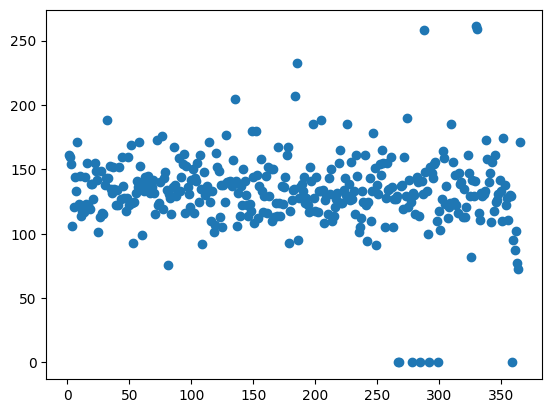

In [47]:
pyplot.scatter(x = daily_sales.index, y = daily_sales["item_count"])